<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_JoshwinIsac_CIAII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
tweets_data=pd.read_csv('/content/drive/MyDrive/Tweets.csv')
tweets_data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
tweets_data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
tweets_data=tweets_data.dropna(axis=1)
tweets_data

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800
...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800
14636,569587371693355008,negative,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800
14637,569587242672398336,neutral,1.0000,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800
14638,569587188687634433,negative,1.0000,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800


In [ ]:
tweets_data.describe()

,tweet_id,airline_sentiment_confidence,retweet_count
count,1.464000e+04,14640.000000,14640.000000
mean,5.692184e+17,0.900169,0.082650
std,7.791112e+14,0.162830,0.745778
min,5.675883e+17,0.335000,0.000000
25%,5.685592e+17,0.692300,0.000000
50%,5.694779e+17,1.000000,0.000000
75%,5.698905e+17,1.000000,0.000000
max,5.703106e+17,1.000000,44.000000


In [ ]:
tweets_data.shape

(14640, 8)

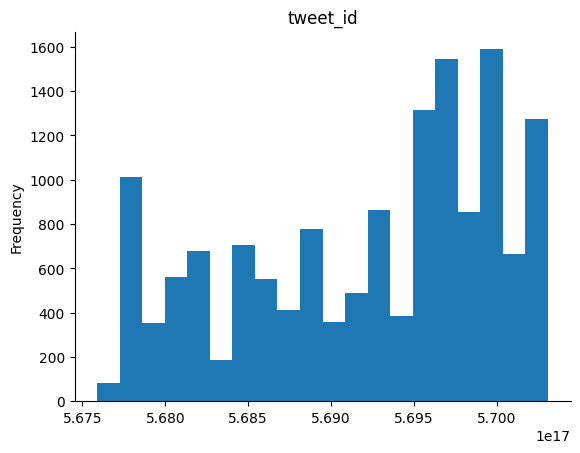

In [ ]:
# @title tweet_id
from matplotlib import pyplot as plt
tweets_data['tweet_id'].plot(kind='hist', bins=20, title='tweet_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

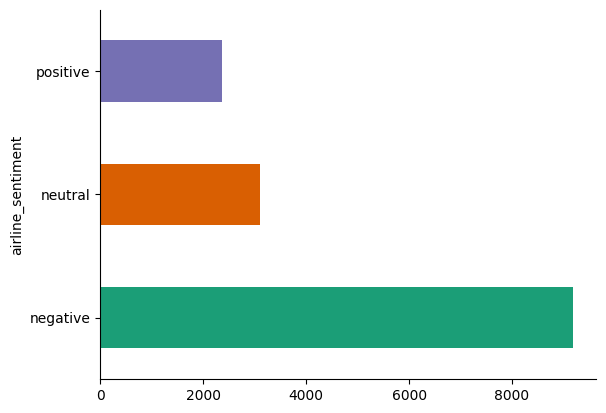

In [ ]:
# @title airline_sentiment
# Bar plot distribution of airline sentiment where people have given positive ,negative, and neutral
import seaborn as sn
tweets_data.groupby('airline_sentiment').size().plot(kind='barh', color=sn.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
airline_counts=tweets_data['airline'].value_counts()
airline_counts

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

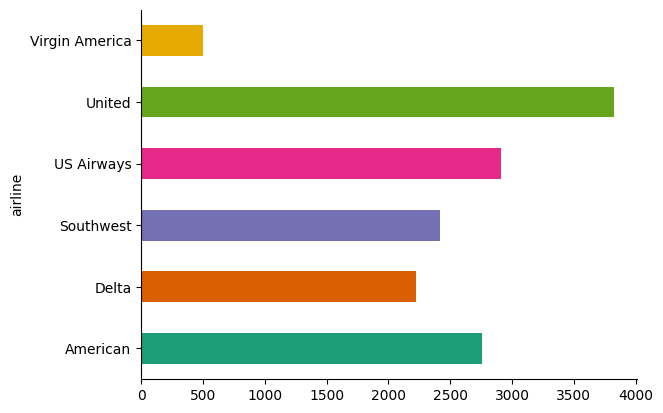

In [ ]:
# @title airline
#plot distribution of people who have booked the airlines
tweets_data.groupby('airline').size().plot(kind='barh', color=sn.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
tweet_count=tweets_data['airline_sentiment'].value_counts()
tweet_count

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

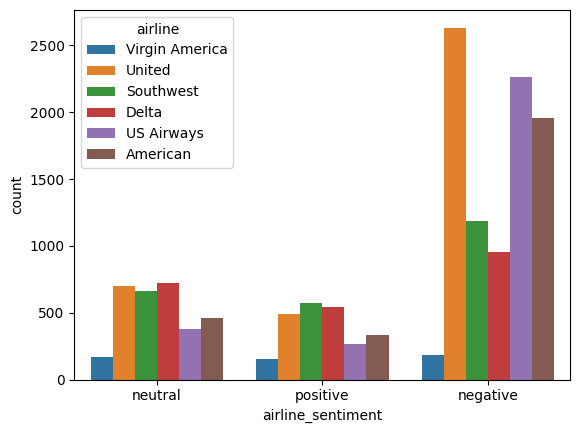

In [ ]:
import seaborn as sn
sn.countplot(x ='airline_sentiment',hue='airline' ,data = tweets_data)
# Show the plot
plt.show()


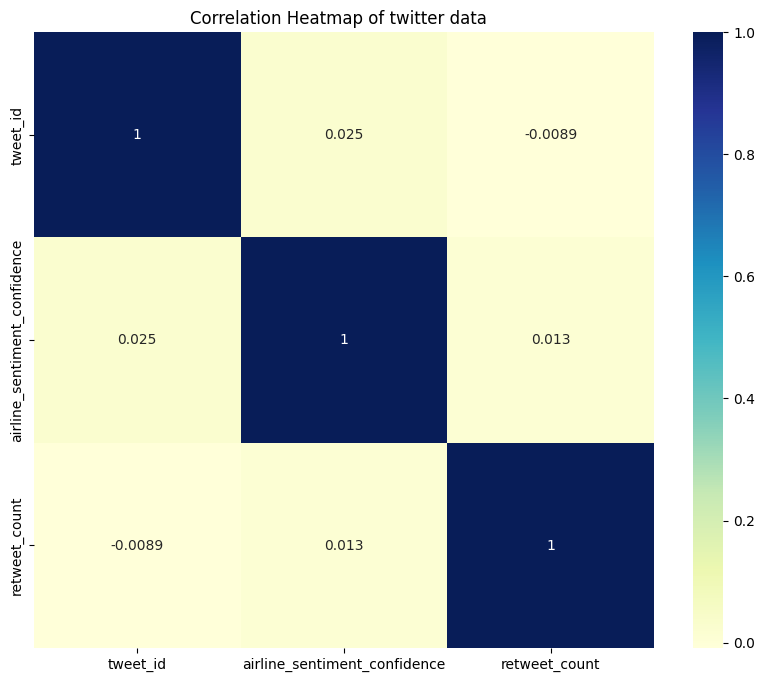

In [ ]:
plt.figure(figsize=(10, 8))
sn.heatmap(tweets_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of twitter data  ')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense


In [ ]:
# Keeping only the necessary columns
tweets_data = tweets_data[['text', 'airline_sentiment']]

# dropping rows with missing values
tweets_data.dropna(inplace=True)

# Converting categorical variables to numerical representations
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
tweets_data['airline_sentiment'] = tweets_data['airline_sentiment'].map(sentiment_mapping)

# Tokenization
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(tweets_data['text'])

# Converting text to sequences
sequences = tokenizer.texts_to_sequences(tweets_data['text'])

# Padding sequences to make them of same length
maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)

# Converting sentiment labels to numerical values
y = tweets_data['airline_sentiment']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-17-51e78287c94d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data.dropna(inplace=True)
<ipython-input-17-51e78287c94d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data['airline_sentiment'] = tweets_data['airline_sentiment'].map(sentiment_mapping)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, LSTM

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 64, input_length=maxlen))
model.add(SimpleRNN(64))
model.add(Dense(3, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history=model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluating Accuracy of the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/5
165/165 [==============================] - 32s 180ms/step - loss: 0.8270 - accuracy: 0.6529 - val_loss: 0.6589 - val_accuracy: 0.7176
Epoch 2/5
165/165 [==============================] - 20s 122ms/step - loss: 0.4691 - accuracy: 0.8253 - val_loss: 0.5911 - val_accuracy: 0.7637
Epoch 3/5
165/165 [==============================] - 18s 106ms/step - loss: 0.2079 - accuracy: 0.9329 - val_loss: 0.5935 - val_accuracy: 0.7662
Epoch 4/5
165/165 [==============================] - 19s 114ms/step - loss: 0.0916 - accuracy: 0.9742 - val_loss: 0.7302 - val_accuracy: 0.7782
Epoch 5/5
92/92 [==============================] - 1s 10ms/step - loss: 0.8401 - accuracy: 0.7497
Test Accuracy: 0.749658465385437


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 648451 (2.47 MB)
Trainable params: 648451 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


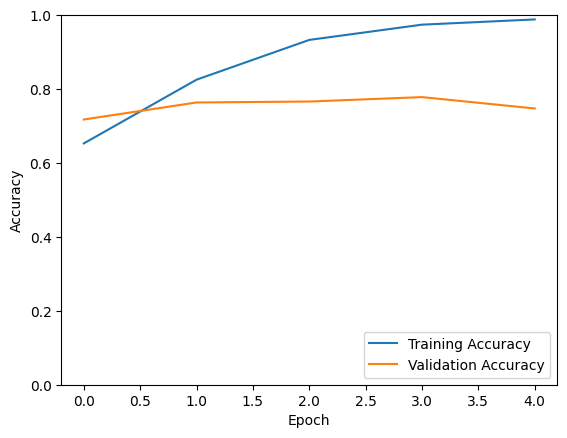

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

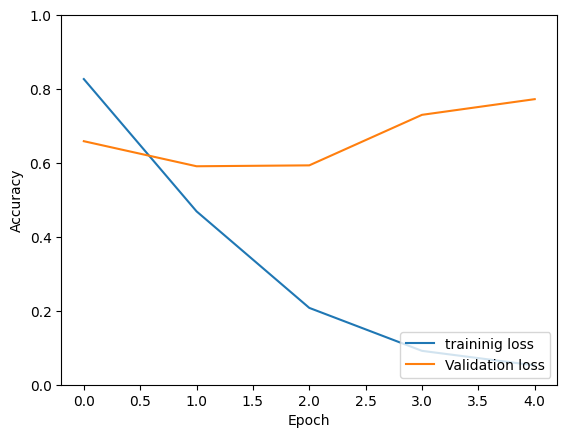

In [ ]:
plt.plot(history.history['loss'], label='traininig loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_train.shape

In [ ]:
X.shape

In [ ]:
y.shape

Epoch 1/5
165/165 [==============================] - 75s 427ms/step - loss: 0.7296 - accuracy: 0.6927 - val_loss: 0.6043 - val_accuracy: 0.7210
Epoch 2/5
165/165 [==============================] - 62s 375ms/step - loss: 0.4586 - accuracy: 0.8199 - val_loss: 0.4833 - val_accuracy: 0.8123
Epoch 3/5
165/165 [==============================] - 58s 352ms/step - loss: 0.3231 - accuracy: 0.8818 - val_loss: 0.5110 - val_accuracy: 0.8072
Epoch 4/5
165/165 [==============================] - 57s 348ms/step - loss: 0.2419 - accuracy: 0.9145 - val_loss: 0.5482 - val_accuracy: 0.8029
Epoch 5/5
92/92 [==============================] - 3s 32ms/step - loss: 0.6700 - accuracy: 0.7845
Test Accuracy: 0.7844945192337036


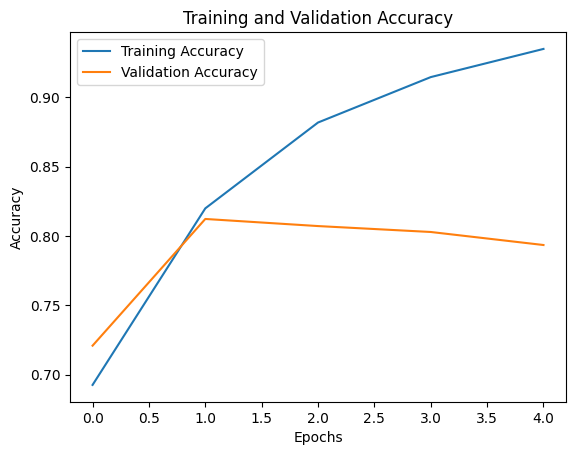

In [ ]:
# Defining the LSTM model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluating the accuracy of the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()